In [1]:
import torch
import models
import logging
import utils
import data
import matplotlib.pyplot as plt
from os.path import join
from importlib import reload

logger = logging.getLogger()

In [6]:
reload(models)
reload(utils)
reload(data)

<module 'data' from '/users/eleves-b/2021/gaetan.ecrepont/MVA/code/src/data.py'>

In [ ]:
dims = [1,5,50]
cov_types = ["spherical", "diagonal", "general"]
colors = ["red", "green", "blue"]
symbols = [r"\Sigma", r"\Sigma'", "C"]
M = 2500 # 250_000
L = 20
x = list(range(L))
rank = False
normalize = False

res = {}

for cov_type in cov_types:
    for i, d in enumerate(dims):
        sweep_dir = f"sweeps/g{d}_{cov_type[:3]}"
        errors = utils.assess_performance_sweep(sweep_dir, L, cov_type, M)
        res[d] = dict(zip(symbols,errors))
    
    for i, symbol in enumerate(symbols):
        plt.figure(dpi=150)
        for j, d in enumerate(dims):
            error, mean, std = utils.clean_error(res[d][symbol], rank, normalize)
            plt.errorbar(x, mean, std, marker="o-", color=colors[i], label=f"d={d}")
        plt.xlabel("DSB iteration $n$")
        plt.xticks(x[::5])
        plt.ylabel(r"$||\hat{" + symbol + r"}-" + symbol + r"||^2_F$")
        plt.legend()
        plt.title(f"Error over DSB iteration ({cov_type})")
        plt.show()

25 folders in sweeps/g1_sph
25 folders after filtering on cov_type=spherical
25 exps after filtering on existence of beta_19.pt


In [39]:
Sigma_error, Sigma_prime_error, C_error = utils.assess_performance_sweep("sweeps/g50", M=25_000, L=20, cov_type="spherical", rel=False)

Found 30 folders in sweeps/g50
10 folders after filtering on spherical
10 exps after filtering on status.yaml file too


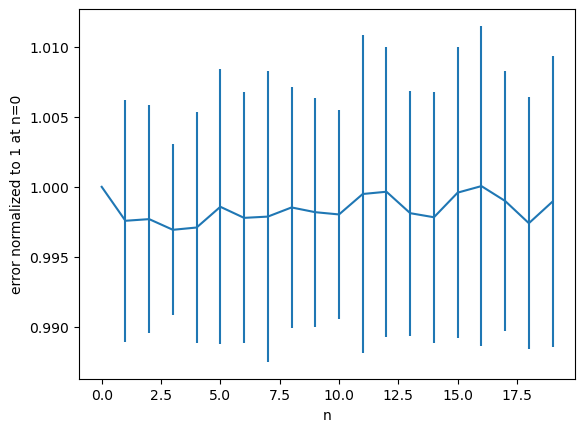

In [41]:
S = Sigma_error.T
S = S / S[0]
mean, std = S.mean(dim=1), S.std(dim=1)
x = range(len(mean))
plt.errorbar(x, mean, std)
plt.xlabel("n")
plt.ylabel("error normalized to 1 at n=0")
plt.show()

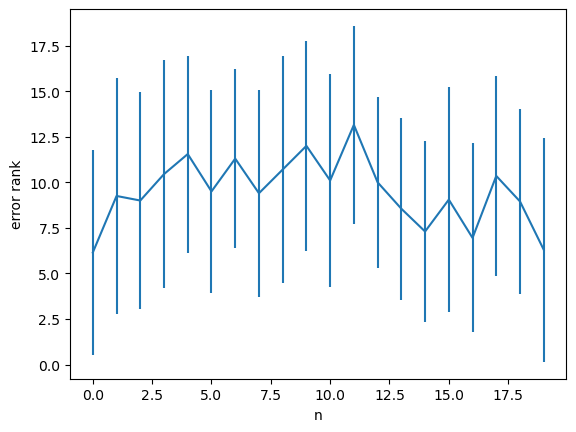

In [32]:
S = torch.argsort(Sigma_error.T, dim=0).float()
S = S[:,:20]
mean, std = S.mean(dim=1), S.std(dim=1)
x = range(len(mean))
plt.errorbar(x, mean, std)
plt.xlabel("n")
plt.ylabel("error rank")
plt.show()

Found 10 exps in sweeps/g50 for cov_type spherical


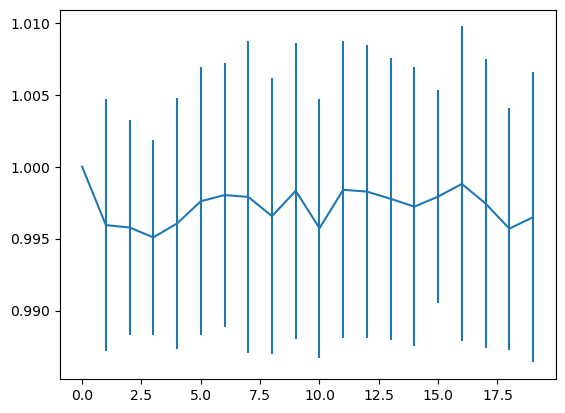

In [530]:
Sigma_error, Sigma_prime_error, C_error = utils.assess_performance_sweep("sweeps/g50", M=250_000, L=20, cov_type="spherical", rel=False)
S = Sigma_error.T
S = S / S[0]
mean, std = S.mean(dim=1), S.std(dim=1)
x = range(len(mean))
plt.errorbar(x, mean, std)
plt.show()

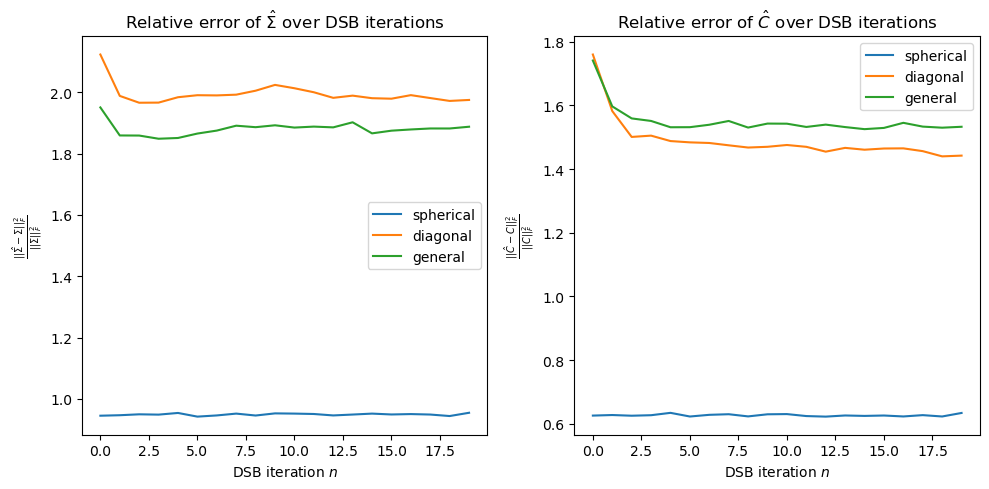

In [338]:
sweep_dir = "experiments/gaussian"
exp = "50d"
utils.plot_perf(sweep_dir, exp, L=20, direction="reverse", M=25_000)

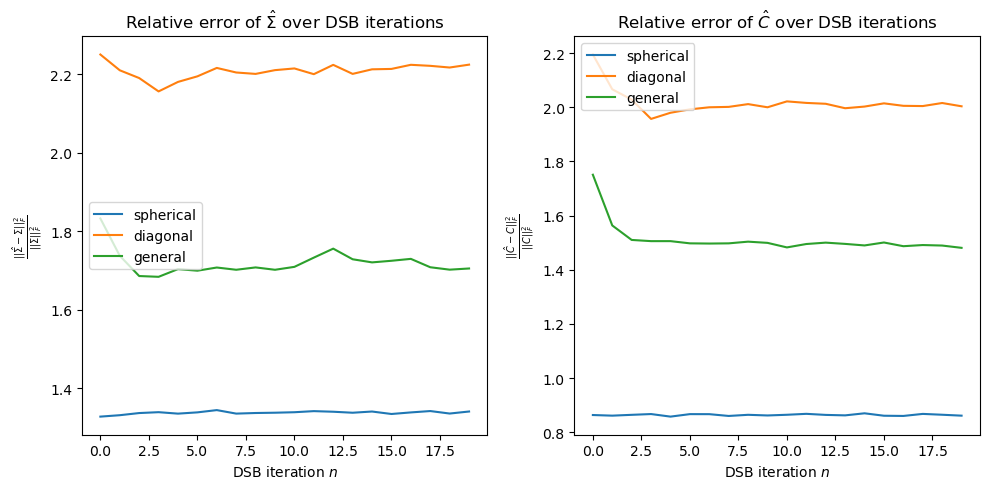

In [372]:
sweep_dir = "experiments/gaussian"
exp = "50d_2"
utils.plot_perf(sweep_dir, exp, L=20, direction="reverse", M=25_000)

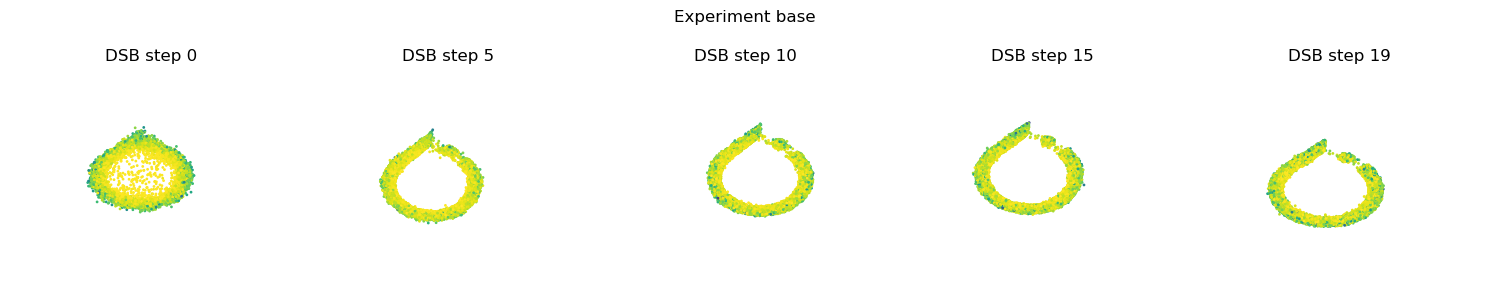

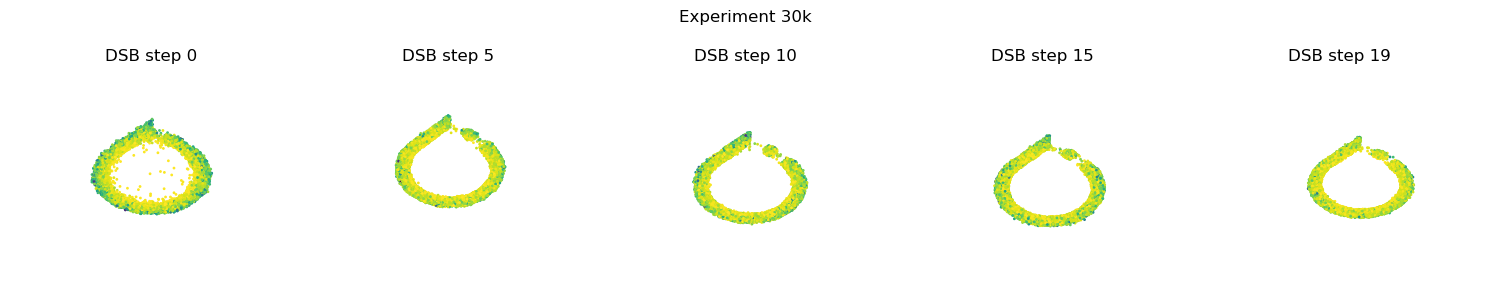

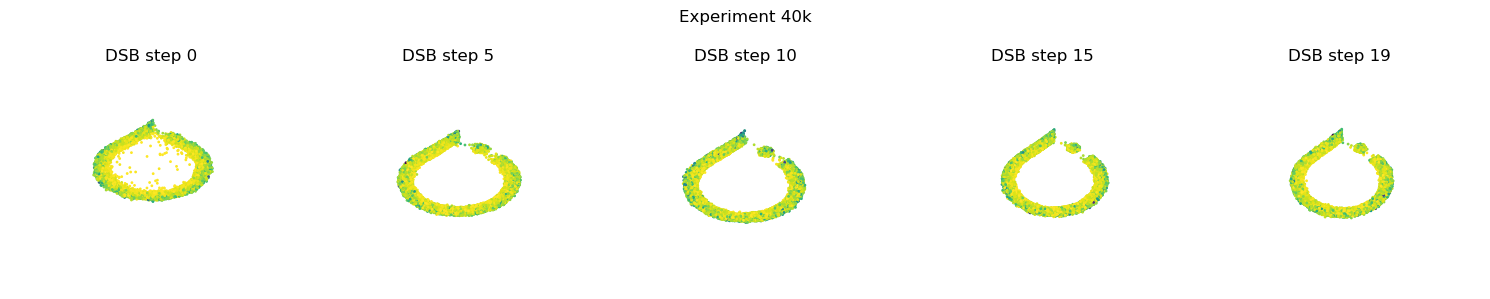

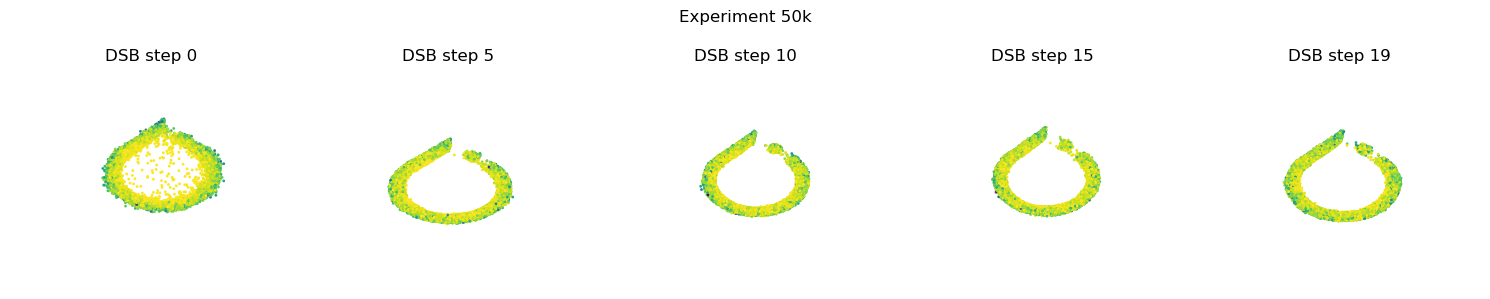

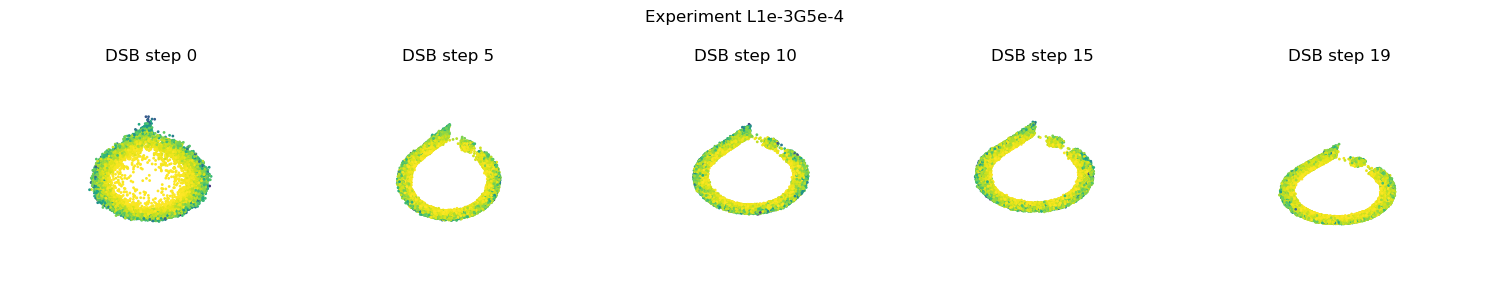

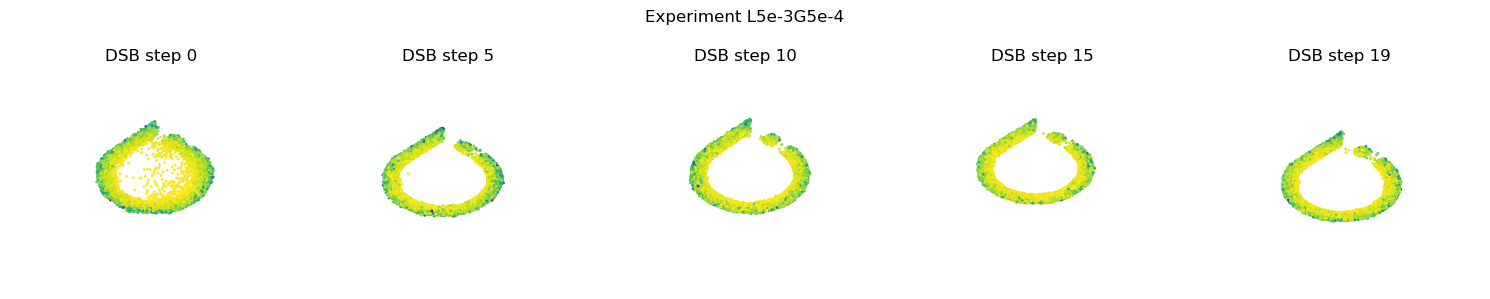

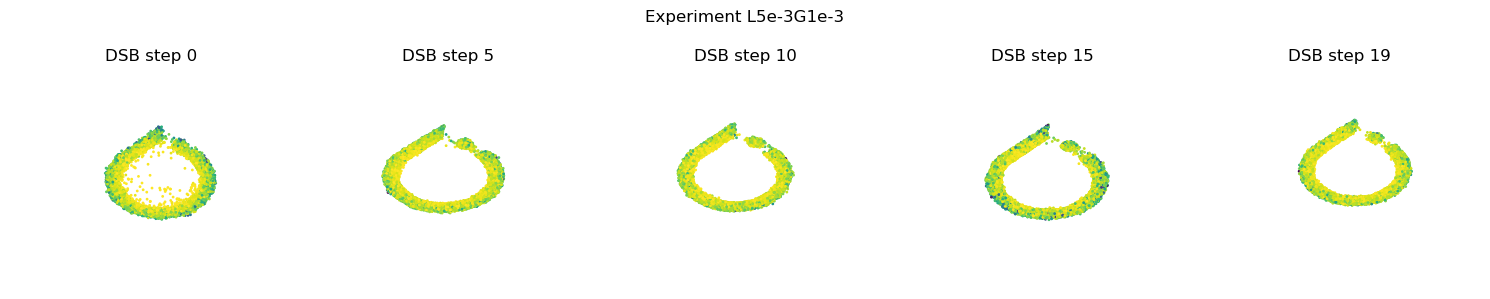

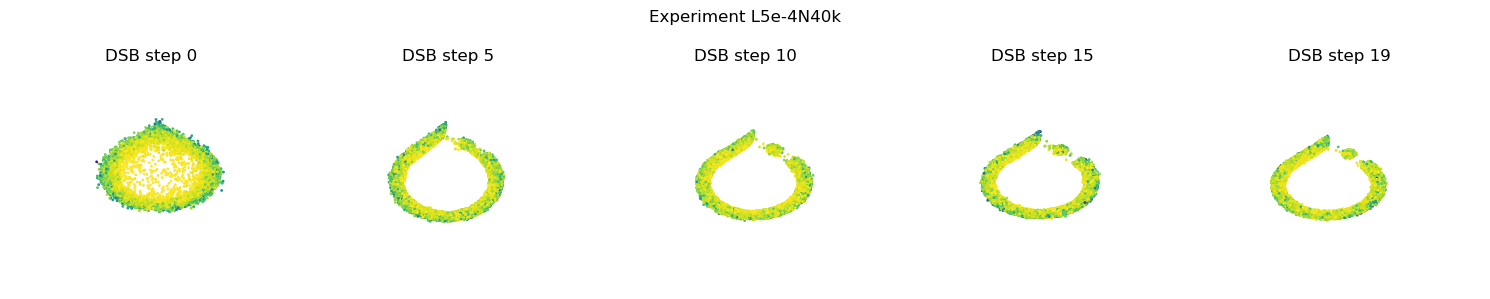

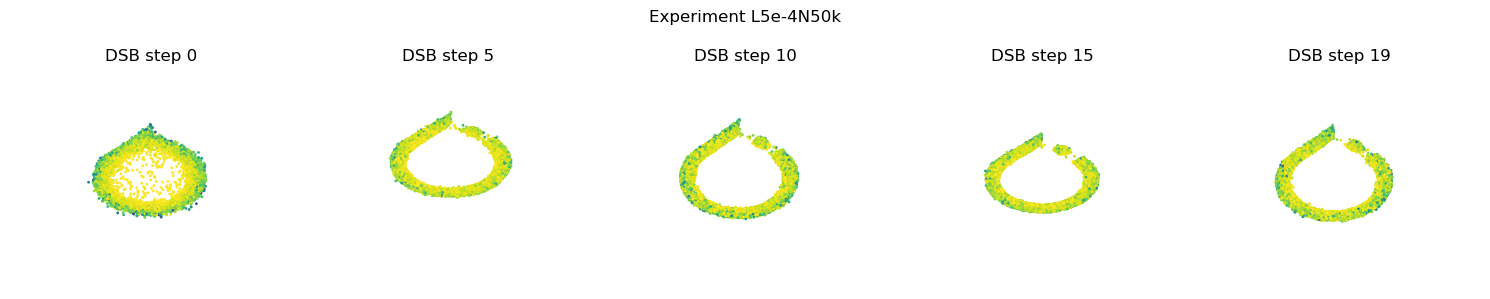

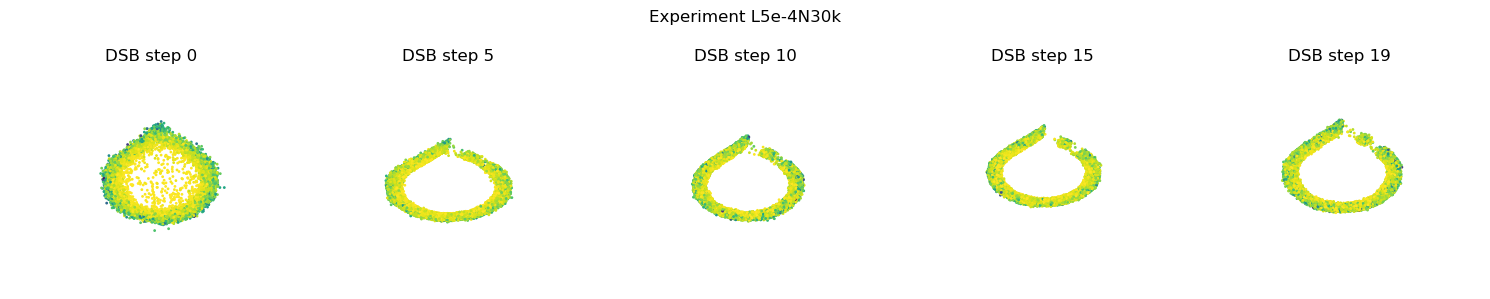

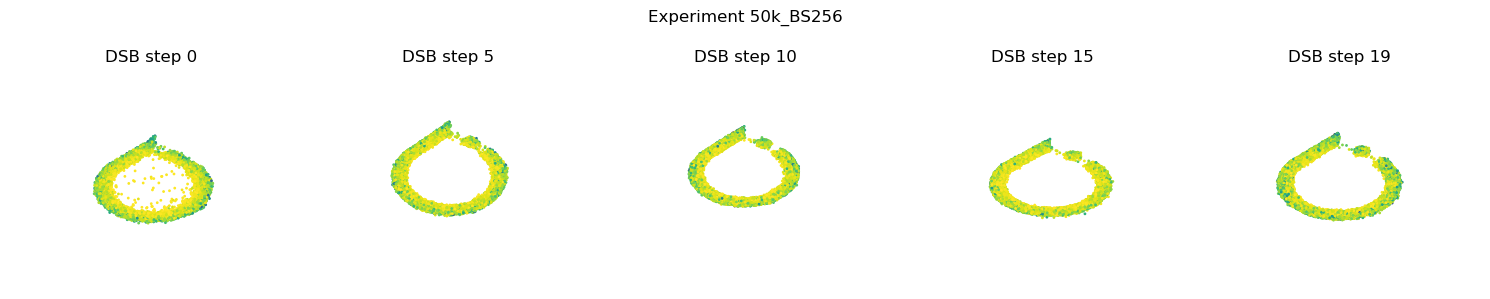

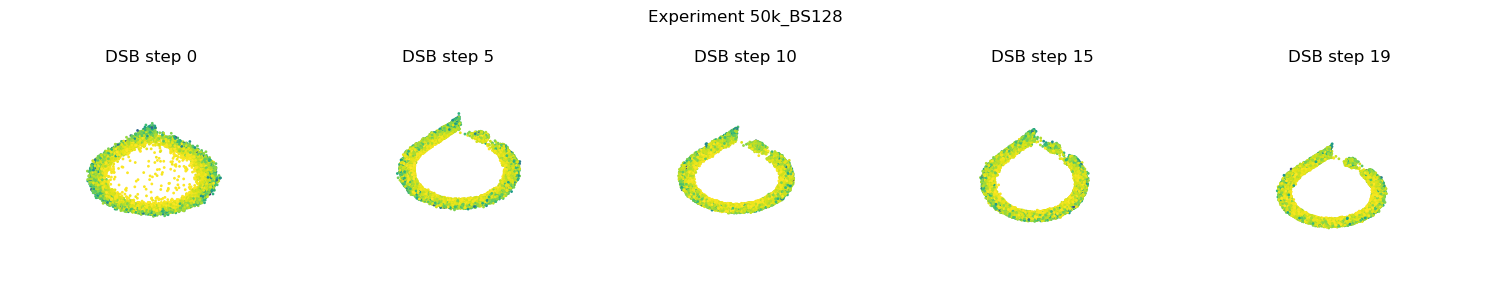

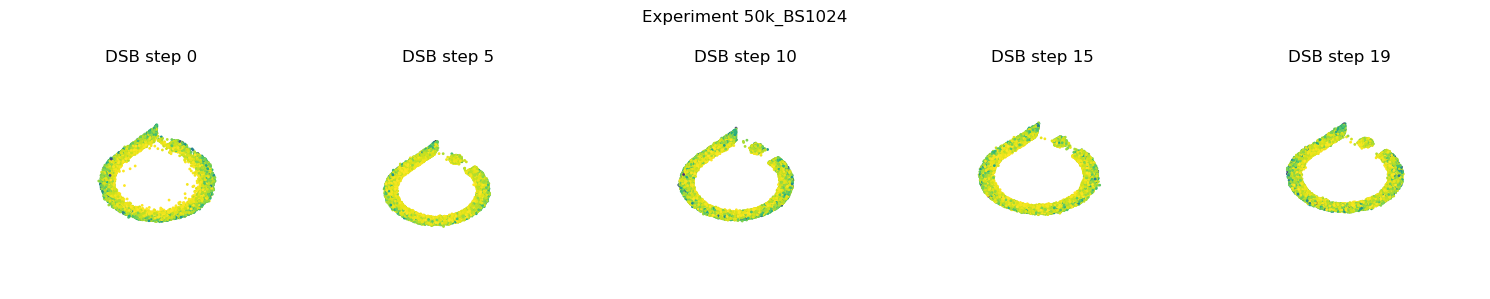

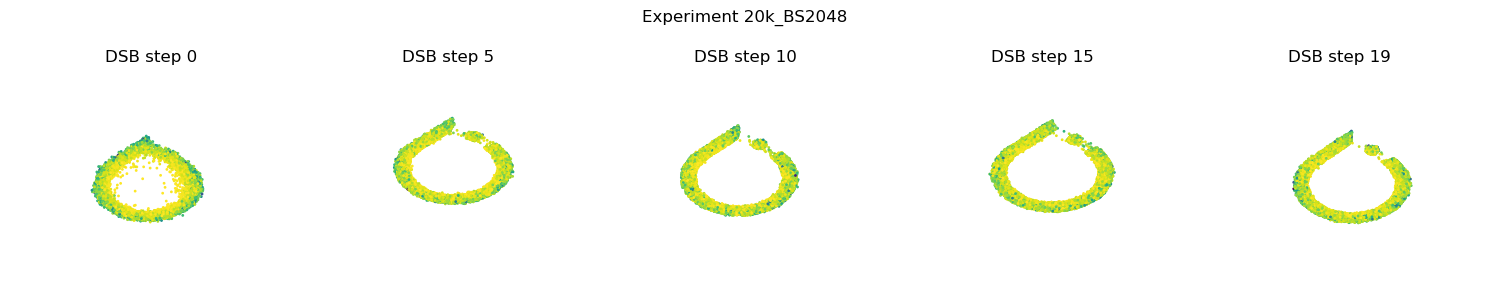

In [22]:
sweep_dir = "sweeps/sweep7"
M = 10_000
list_n = [0, 5, 10, 15, 19]
utils.plot_sweep(sweep_dir, list_n, logger, M=M, reverse=True, ema=True, remove_last_noise=True)